In [1]:
import sqlite3 as sql
import pandas as pd
# from datetime import timedelta
# import missingno as mssgno

In [7]:
class read_eplusql:
    def __init__(self,file):
        self.myconn = sql.connect(file)
        command = "SELECT ReportDataDictionaryIndex, KeyValue, Name, Units FROM ReportDataDictionary"
        variables = pd.read_sql_query(command,con=self.myconn)

        variables['variable_name'] = variables.KeyValue + ':' + variables.Name + ' (' + variables.Units + ')'
        self.variables = variables
        self.vars = variables.variable_name.unique()
    def read_variables(self):
    
        command = "SELECT tm.TimeIndex, tm.Year, tm.Month, tm.Day, tm.Hour, tm.Minute FROM Time AS tm"
        time = pd.read_sql_query(command,con=self.myconn)
        time = time[time.Year!=0]
        command = """SELECT ReportData.TimeIndex, ReportData.ReportDataDictionaryIndex, ReportData.Value
          FROM (ReportData INNER JOIN ReportDataDictionary ON ReportData.ReportDataDictionaryIndex = ReportDataDictionary.ReportDataDictionaryIndex) 
          INNER JOIN Time ON ReportData.TimeIndex = Time.TimeIndex"""
        data = pd.read_sql_query(command,con=self.myconn)
        data_variables = pd.merge(data,self.variables)
        data_variables_time = pd.merge(data_variables,time)
        df = data_variables_time.copy()
        df['date'] = pd.to_datetime(df[['Year','Month','Day']])
        df.loc[df.Hour==24,'date'] += pd.Timedelta('1D')
        df.loc[df.Hour==24,'Hour'] = 0
        df['date'] = pd.to_datetime(df[['Year','Month','Day','Hour','Minute']])
        df['variable_name'] = df.KeyValue + ':' + df.Name + ' (' + df.Units + ')'
        df  = df.pivot_table(index="date", columns="variable_name", values="Value")
        self.data = df
    def get_data(self,variables):
        return self.data[variables]


In [9]:
df = read_eplusql("../data/eplusout.sql")
df.read_variables()
df.vars

array(['Environment:Site Outdoor Air Drybulb Temperature (C)',
       'N1AU401:Zone Mean Air Temperature (C)',
       'N1AU402:Zone Mean Air Temperature (C)',
       'N1AU403:Zone Mean Air Temperature (C)',
       'N1AU404:Zone Mean Air Temperature (C)',
       'N2AU101:Zone Mean Air Temperature (C)',
       'N2AU102:Zone Mean Air Temperature (C)',
       'N2AU103:Zone Mean Air Temperature (C)',
       'N2AU201:Zone Mean Air Temperature (C)',
       'N2AU202:Zone Mean Air Temperature (C)',
       'N2AU203:Zone Mean Air Temperature (C)',
       'N2PASILLO:Zone Mean Air Temperature (C)',
       'N2STR:Zone Mean Air Temperature (C)',
       'PBADM:Zone Mean Air Temperature (C)',
       'PBATENCIONCOFI:Zone Mean Air Temperature (C)',
       'PBCOORCOFI:Zone Mean Air Temperature (C)',
       'PBCOORDINACION:Zone Mean Air Temperature (C)',
       'PBDUCTOCOFI:Zone Mean Air Temperature (C)',
       'PBDUCTOSALAS:Zone Mean Air Temperature (C)',
       'PBDUCTOSCOM:Zone Mean Air Temperature (C)

In [16]:
variables = ['Environment:Site Outdoor Air Drybulb Temperature (C)',
       'N1AU404:Zone Mean Air Temperature (C)',
       'N2AU101:Zone Mean Air Temperature (C)',
       'N2AU102:Zone Mean Air Temperature (C)',
       'N2AU103:Zone Mean Air Temperature (C)',]

In [17]:
caso1 = df.get_data(variables)

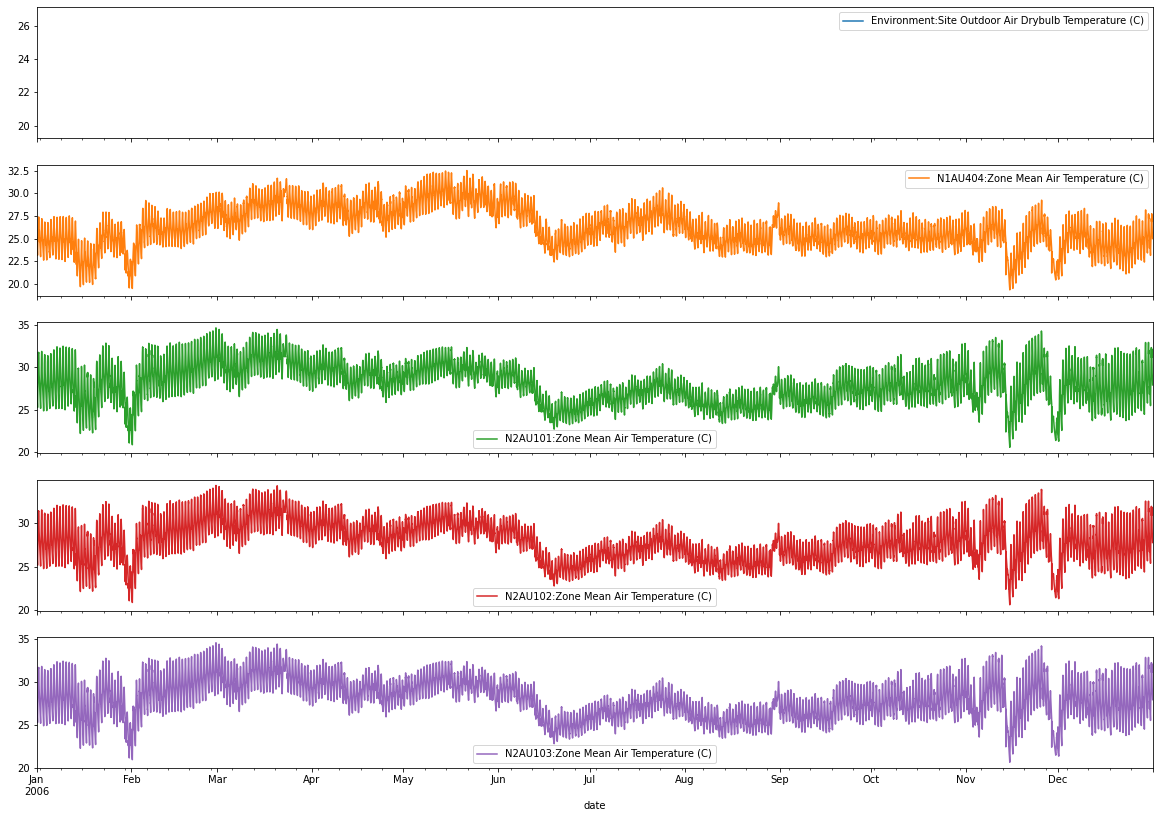

In [18]:
caso1.plot(subplots=True,figsize=(20,14));